In [1]:
SensorNum=4 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccY' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

AccY is registed now
Build Complete
(254742,)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
41s - loss: 0.0034 - val_loss: 0.0012
Epoch 2/50
39s - loss: 0.0010 - val_loss: 9.0183e-04
Epoch 3/50
39s - loss: 8.0823e-04 - val_loss: 7.4164e-04
Epoch 4/50
40s - loss: 6.8467e-04 - val_loss: 6.3453e-04
Epoch 5/50
50s - loss: 5.9154e-04 - val_loss: 5.5133e-04
Epoch 6/50
61s - loss: 4.9487e-04 - val_loss: 4.5596e-04
Epoch 7/50
61s - loss: 4.0086e-04 - val_loss: 3.5578e-04
Epoch 8/50
61s - loss: 3.3610e-04 - val_loss: 3.1260e-04
Epoch 9/50
61s - loss: 2.9666e-04 - val_loss: 2.7747e-04
Epoch 10/50
61s - loss: 2.6912e-04 - val_loss: 2.5284e-04
Epoch 11/50
61s - loss: 2.4467e-04 - val_loss: 2.3248e-04
Epoch 12/50
62s - loss: 2.2733e-04 - val_loss: 2.1766e-04
Epoch 13/50
61s - loss: 2.1153e-04 - val_loss: 2.0433e-04
Epoch 14/50
61s - loss: 1.9610e-04 - val_loss: 1.8288e-04
Epoch 15/50


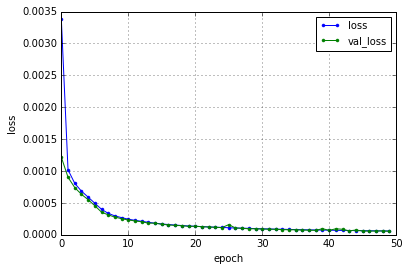

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0034 - val_loss: 6.5788e-04
Epoch 2/50
62s - loss: 4.4911e-04 - val_loss: 3.1456e-04
Epoch 3/50
62s - loss: 2.4745e-04 - val_loss: 2.0381e-04
Epoch 4/50
62s - loss: 1.7751e-04 - val_loss: 1.5630e-04
Epoch 5/50
62s - loss: 1.4799e-04 - val_loss: 1.3574e-04
Epoch 6/50
61s - loss: 1.2532e-04 - val_loss: 1.1755e-04
Epoch 7/50
62s - loss: 1.1150e-04 - val_loss: 1.0490e-04
Epoch 8/50
62s - loss: 9.9065e-05 - val_loss: 9.0243e-05
Epoch 9/50
62s - loss: 9.0328e-05 - val_loss: 8.2858e-05
Epoch 10/50
62s - loss: 8.3292e-05 - val_loss: 7.9367e-05
Epoch 11/50
62s - loss: 7.7112e-05 - val_loss: 7.3059e-05
Epoch 12/50
62s - loss: 7.1141e-05 - val_loss: 6.6882e-05
Epoch 13/50
61s - loss: 6.5855e-05 - val_loss: 6.3152e-05
Epoch 14/50
61s - loss: 6.1932e-05 - val_loss: 6.2443e-05
Epoch 15/50
62s - loss: 5.8142e-05 - val_loss: 5.3331e-05
Epoch 16/50
62s - loss: 5.5857e-05 - val_loss: 4.8737e-05
Epoch 17/50
62s - lo

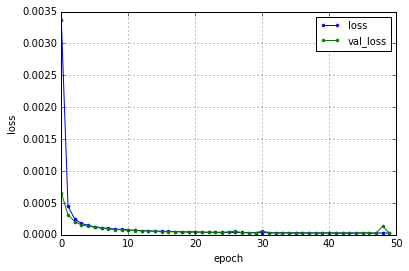

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0026 - val_loss: 4.4584e-04
Epoch 2/50
61s - loss: 3.1780e-04 - val_loss: 2.4582e-04
Epoch 3/50
61s - loss: 1.9796e-04 - val_loss: 1.6006e-04
Epoch 4/50
62s - loss: 1.4035e-04 - val_loss: 1.1974e-04
Epoch 5/50
61s - loss: 1.1378e-04 - val_loss: 1.0157e-04
Epoch 6/50
61s - loss: 9.7702e-05 - val_loss: 9.4353e-05
Epoch 7/50
61s - loss: 8.4725e-05 - val_loss: 8.4891e-05
Epoch 8/50
62s - loss: 7.6109e-05 - val_loss: 6.9262e-05
Epoch 9/50
62s - loss: 6.7873e-05 - val_loss: 6.1955e-05
Epoch 10/50
61s - loss: 6.2747e-05 - val_loss: 6.6529e-05
Epoch 11/50
61s - loss: 5.8285e-05 - val_loss: 5.4992e-05
Epoch 12/50
62s - loss: 5.4261e-05 - val_loss: 4.7068e-05
Epoch 13/50
61s - loss: 5.0802e-05 - val_loss: 4.4445e-05
Epoch 14/50
61s - loss: 4.7540e-05 - val_loss: 4.2644e-05
Epoch 15/50
61s - loss: 4.4885e-05 - val_loss: 4.8381e-05
Epoch 16/50
61s - loss: 4.2490e-05 - val_loss: 5.2543e-05
Epoch 17/50
61s - l

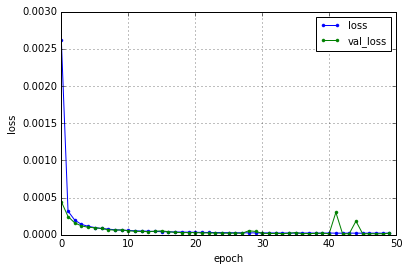

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0016 - val_loss: 3.5379e-04
Epoch 2/50
62s - loss: 2.6356e-04 - val_loss: 2.1195e-04
Epoch 3/50
61s - loss: 1.7554e-04 - val_loss: 1.4264e-04
Epoch 4/50
62s - loss: 1.2625e-04 - val_loss: 1.0985e-04
Epoch 5/50
61s - loss: 1.0183e-04 - val_loss: 9.2496e-05
Epoch 6/50
61s - loss: 8.3553e-05 - val_loss: 7.4523e-05
Epoch 7/50
61s - loss: 7.2451e-05 - val_loss: 6.4524e-05
Epoch 8/50
61s - loss: 6.2940e-05 - val_loss: 5.4600e-05
Epoch 9/50
61s - loss: 5.5218e-05 - val_loss: 4.9771e-05
Epoch 10/50
61s - loss: 4.9993e-05 - val_loss: 4.7237e-05
Epoch 11/50
61s - loss: 4.4918e-05 - val_loss: 3.8968e-05
Epoch 12/50
61s - loss: 4.0973e-05 - val_loss: 3.6660e-05
Epoch 13/50
61s - loss: 3.8576e-05 - val_loss: 3.4259e-05
Epoch 14/50
62s - loss: 3.5854e-05 - val_loss: 3.2575e-05
Epoch 15/50
61s - loss: 3.3728e-05 - val_loss: 3.0671e-05
Epoch 16/50
62s - loss: 3.1791e-05 - val_loss: 2.5064e-05
Epoch 17/50
62s - l

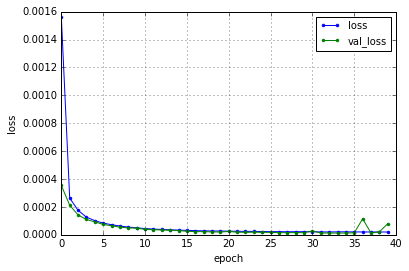

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
65s - loss: 9.4975e-04 - val_loss: 1.7434e-04
Epoch 2/50
65s - loss: 1.3882e-04 - val_loss: 9.5608e-05
Epoch 3/50
64s - loss: 8.3623e-05 - val_loss: 8.0581e-05
Epoch 4/50
64s - loss: 6.0037e-05 - val_loss: 5.1860e-05
Epoch 5/50
64s - loss: 4.8539e-05 - val_loss: 3.7097e-05
Epoch 6/50
65s - loss: 3.9820e-05 - val_loss: 3.9387e-05
Epoch 7/50
65s - loss: 3.4792e-05 - val_loss: 3.3287e-05
Epoch 8/50
65s - loss: 3.0968e-05 - val_loss: 2.5609e-05
Epoch 9/50
65s - loss: 2.8575e-05 - val_loss: 2.6419e-05
Epoch 10/50
65s - loss: 2.6542e-05 - val_loss: 2.0901e-05
Epoch 11/50
64s - loss: 2.4492e-05 - val_loss: 1.7476e-05
Epoch 12/50
65s - loss: 2.3327e-05 - val_loss: 6.1417e-05
Epoch 13/50
65s - loss: 2.1762e-05 - val_loss: 1.4430e-05
Epoch 14/50
63s - loss: 2.0992e-05 - val_loss: 1.5527e-05
Epoch 15/50
63s - loss: 2.0973e-05 - val_loss: 1.5415e-05
Epoch 16/50
64s - loss: 1.9595e-05 - val_loss: 1.2408e-05
Epoch 17/50
64s

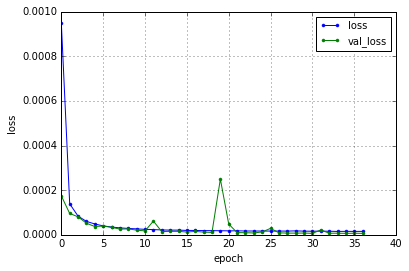

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 5.9259e-04 - val_loss: 1.0926e-04
Epoch 2/50
61s - loss: 6.2023e-05 - val_loss: 5.6382e-05
Epoch 3/50
61s - loss: 4.1662e-05 - val_loss: 3.3917e-05
Epoch 4/50
59s - loss: 3.2971e-05 - val_loss: 3.1003e-05
Epoch 5/50
61s - loss: 2.8852e-05 - val_loss: 2.4223e-05
Epoch 6/50
60s - loss: 2.5734e-05 - val_loss: 2.4612e-05
Epoch 7/50
60s - loss: 2.2880e-05 - val_loss: 1.9338e-05
Epoch 8/50
59s - loss: 2.0616e-05 - val_loss: 1.7302e-05
Epoch 9/50
57s - loss: 1.8462e-05 - val_loss: 1.5666e-05
Epoch 10/50
54s - loss: 1.6936e-05 - val_loss: 1.4382e-05
Epoch 11/50
48s - loss: 1.5840e-05 - val_loss: 1.2795e-05
Epoch 12/50
48s - loss: 1.4364e-05 - val_loss: 1.2432e-05
Epoch 13/50
48s - loss: 1.3347e-05 - val_loss: 1.0589e-05
Epoch 14/50
47s - loss: 1.2235e-05 - val_loss: 9.8942e-06
Epoch 15/50
48s - loss: 1.1580e-05 - val_loss: 9.6743e-06
Epoch 16/50
48s - loss: 1.0864e-05 - val_loss: 8.9364e-06
Epoch 17/50
49s

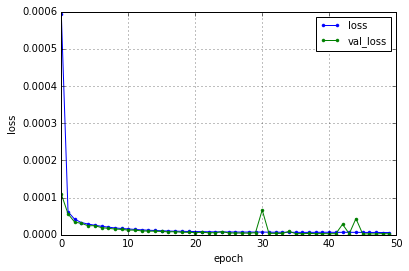

AccY is registed now
Build Complete
(254742,)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0111 - val_loss: 0.0044
Epoch 2/50
12s - loss: 0.0030 - val_loss: 0.0023
Epoch 3/50
12s - loss: 0.0021 - val_loss: 0.0018
Epoch 4/50
12s - loss: 0.0017 - val_loss: 0.0015
Epoch 5/50
12s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
12s - loss: 0.0011 - val_loss: 0.0010
Epoch 7/50
12s - loss: 9.9062e-04 - val_loss: 9.4261e-04
Epoch 8/50
12s - loss: 9.1633e-04 - val_loss: 8.8171e-04
Epoch 9/50
12s - loss: 8.6323e-04 - val_loss: 8.3715e-04
Epoch 10/50
12s - loss: 8.1896e-04 - val_loss: 7.9250e-04
Epoch 11/50
12s - loss: 7.8230e-04 - val_loss: 7.5477e-04
Epoch 12/50
12s - loss: 7.4773e-04 - val_loss: 7.3693e-04
Epoch 13/50
12s - loss: 7.1620e-04 - val_loss: 6.9407e-04
Epoch 14/50
12s - loss: 6.8746e-04 - val_loss: 6.6897e-04
Epoch 15/50
12s - loss: 6.5875e-04 - val_loss: 6

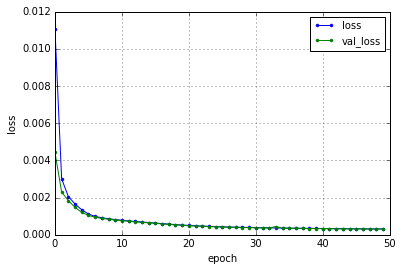

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0091 - val_loss: 0.0024
Epoch 2/50
12s - loss: 0.0019 - val_loss: 0.0015
Epoch 3/50
12s - loss: 0.0012 - val_loss: 0.0010
Epoch 4/50
12s - loss: 8.5880e-04 - val_loss: 7.4572e-04
Epoch 5/50
12s - loss: 6.4639e-04 - val_loss: 6.1133e-04
Epoch 6/50
12s - loss: 5.3269e-04 - val_loss: 5.0885e-04
Epoch 7/50
12s - loss: 4.6463e-04 - val_loss: 4.2788e-04
Epoch 8/50
12s - loss: 4.1753e-04 - val_loss: 3.8973e-04
Epoch 9/50
12s - loss: 3.7889e-04 - val_loss: 3.5759e-04
Epoch 10/50
12s - loss: 3.4607e-04 - val_loss: 3.3671e-04
Epoch 11/50
12s - loss: 3.1887e-04 - val_loss: 3.1147e-04
Epoch 12/50
12s - loss: 2.9477e-04 - val_loss: 2.8299e-04
Epoch 13/50
12s - loss: 2.7364e-04 - val_loss: 2.5965e-04
Epoch 14/50
12s - loss: 2.5602e-04 - val_loss: 2.4274e-04
Epoch 15/50
12s - loss: 2.4106e-04 - val_loss: 2.2554e-04
Epoch 16/50
12s - loss: 2.2784e-04 - val_loss: 2.1745e-04
Epoch 17/50
12s - loss: 2.1552e-04 - val

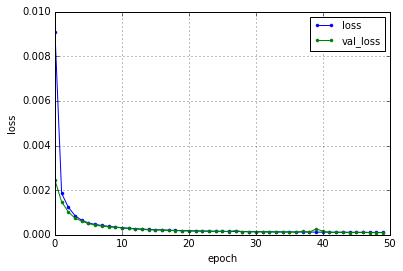

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0067 - val_loss: 0.0017
Epoch 2/50
13s - loss: 0.0013 - val_loss: 8.8082e-04
Epoch 3/50
12s - loss: 7.1897e-04 - val_loss: 5.8936e-04
Epoch 4/50
11s - loss: 5.2672e-04 - val_loss: 4.7368e-04
Epoch 5/50
12s - loss: 4.2336e-04 - val_loss: 3.8877e-04
Epoch 6/50
12s - loss: 3.6157e-04 - val_loss: 3.2975e-04
Epoch 7/50
12s - loss: 3.1478e-04 - val_loss: 2.8697e-04
Epoch 8/50
11s - loss: 2.8023e-04 - val_loss: 2.5853e-04
Epoch 9/50
12s - loss: 2.5066e-04 - val_loss: 2.3783e-04
Epoch 10/50
12s - loss: 2.2901e-04 - val_loss: 2.1268e-04
Epoch 11/50
12s - loss: 2.1019e-04 - val_loss: 1.9790e-04
Epoch 12/50
12s - loss: 1.9606e-04 - val_loss: 1.8542e-04
Epoch 13/50
12s - loss: 1.8346e-04 - val_loss: 1.6735e-04
Epoch 14/50
13s - loss: 1.7251e-04 - val_loss: 1.6145e-04
Epoch 15/50
12s - loss: 1.6299e-04 - val_loss: 1.5308e-04
Epoch 16/50
11s - loss: 1.5390e-04 - val_loss: 1.4801e-04
Epoch 17/50
12s - loss: 1.4

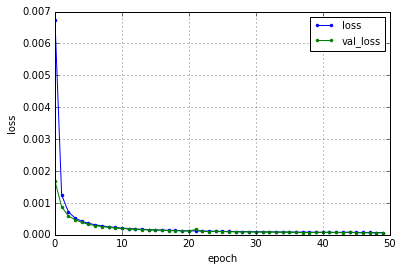

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0035 - val_loss: 0.0013
Epoch 2/50
11s - loss: 9.1949e-04 - val_loss: 6.8217e-04
Epoch 3/50
12s - loss: 5.7151e-04 - val_loss: 4.8335e-04
Epoch 4/50
12s - loss: 4.3294e-04 - val_loss: 3.9024e-04
Epoch 5/50
12s - loss: 3.6059e-04 - val_loss: 3.2529e-04
Epoch 6/50
12s - loss: 3.0403e-04 - val_loss: 3.3096e-04
Epoch 7/50
12s - loss: 2.6130e-04 - val_loss: 2.4677e-04
Epoch 8/50
12s - loss: 2.3010e-04 - val_loss: 2.2735e-04
Epoch 9/50
12s - loss: 2.0419e-04 - val_loss: 1.8478e-04
Epoch 10/50
11s - loss: 1.8599e-04 - val_loss: 1.6876e-04
Epoch 11/50
12s - loss: 1.7049e-04 - val_loss: 1.6495e-04
Epoch 12/50
12s - loss: 1.5712e-04 - val_loss: 2.2070e-04
Epoch 13/50
12s - loss: 1.4681e-04 - val_loss: 1.3476e-04
Epoch 14/50
11s - loss: 1.3735e-04 - val_loss: 1.2476e-04
Epoch 15/50
12s - loss: 1.3065e-04 - val_loss: 1.1719e-04
Epoch 16/50
12s - loss: 1.2413e-04 - val_loss: 1.2077e-04
Epoch 17/50
12s - loss:

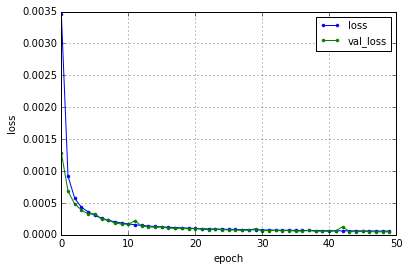

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0031 - val_loss: 7.1223e-04
Epoch 2/50
12s - loss: 4.7378e-04 - val_loss: 3.4864e-04
Epoch 3/50
12s - loss: 2.9712e-04 - val_loss: 2.6462e-04
Epoch 4/50
12s - loss: 2.2322e-04 - val_loss: 1.8972e-04
Epoch 5/50
12s - loss: 1.8359e-04 - val_loss: 1.6152e-04
Epoch 6/50
12s - loss: 1.5622e-04 - val_loss: 1.4130e-04
Epoch 7/50
12s - loss: 1.3753e-04 - val_loss: 1.2308e-04
Epoch 8/50
11s - loss: 1.2404e-04 - val_loss: 1.0859e-04
Epoch 9/50
12s - loss: 1.1198e-04 - val_loss: 1.4930e-04
Epoch 10/50
12s - loss: 1.0391e-04 - val_loss: 9.8174e-05
Epoch 11/50
12s - loss: 9.5793e-05 - val_loss: 8.8101e-05
Epoch 12/50
12s - loss: 8.9229e-05 - val_loss: 7.9776e-05
Epoch 13/50
12s - loss: 8.5806e-05 - val_loss: 7.9858e-05
Epoch 14/50
12s - loss: 8.2400e-05 - val_loss: 7.0312e-05
Epoch 15/50
12s - loss: 7.8219e-05 - val_loss: 7.1659e-05
Epoch 16/50
11s - loss: 7.5255e-05 - val_loss: 6.4973e-05
Epoch 17/50
12s - l

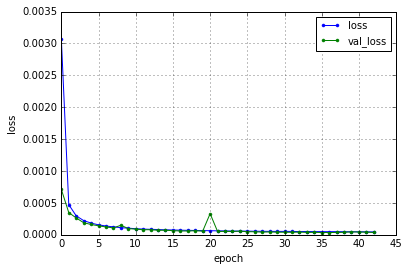

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0016 - val_loss: 3.1461e-04
Epoch 2/50
12s - loss: 2.4957e-04 - val_loss: 1.8742e-04
Epoch 3/50
12s - loss: 1.6913e-04 - val_loss: 1.3633e-04
Epoch 4/50
11s - loss: 1.3111e-04 - val_loss: 1.1069e-04
Epoch 5/50
12s - loss: 1.0979e-04 - val_loss: 9.9400e-05
Epoch 6/50
12s - loss: 9.5149e-05 - val_loss: 8.1697e-05
Epoch 7/50
12s - loss: 8.5619e-05 - val_loss: 7.4721e-05
Epoch 8/50
12s - loss: 7.6917e-05 - val_loss: 7.0494e-05
Epoch 9/50
12s - loss: 7.0481e-05 - val_loss: 1.0645e-04
Epoch 10/50
12s - loss: 6.6432e-05 - val_loss: 5.5436e-05
Epoch 11/50
12s - loss: 6.1594e-05 - val_loss: 5.4456e-05
Epoch 12/50
12s - loss: 5.8975e-05 - val_loss: 4.8630e-05
Epoch 13/50
12s - loss: 5.5864e-05 - val_loss: 4.9345e-05
Epoch 14/50
12s - loss: 5.4229e-05 - val_loss: 4.5007e-05
Epoch 15/50
13s - loss: 5.1280e-05 - val_loss: 4.1395e-05
Epoch 16/50
12s - loss: 4.9931e-05 - val_loss: 3.9400e-05
Epoch 17/50
12s - l

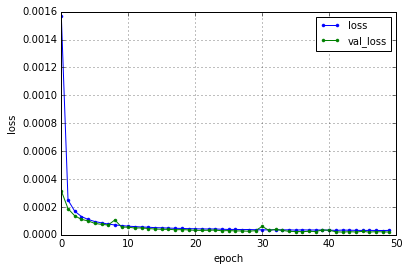

AccY is registed now
Build Complete
(254742,)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0233 - val_loss: 0.0117
Epoch 2/50
3s - loss: 0.0090 - val_loss: 0.0070
Epoch 3/50
3s - loss: 0.0062 - val_loss: 0.0056
Epoch 4/50
3s - loss: 0.0053 - val_loss: 0.0049
Epoch 5/50
2s - loss: 0.0045 - val_loss: 0.0041
Epoch 6/50
3s - loss: 0.0037 - val_loss: 0.0035
Epoch 7/50
3s - loss: 0.0032 - val_loss: 0.0030
Epoch 8/50
3s - loss: 0.0029 - val_loss: 0.0028
Epoch 9/50
3s - loss: 0.0027 - val_loss: 0.0026
Epoch 10/50
3s - loss: 0.0025 - val_loss: 0.0025
Epoch 11/50
3s - loss: 0.0024 - val_loss: 0.0024
Epoch 12/50
3s - loss: 0.0023 - val_loss: 0.0023
Epoch 13/50
3s - loss: 0.0022 - val_loss: 0.0022
Epoch 14/50
3s - loss: 0.0022 - val_loss: 0.0021
Epoch 15/50
3s - loss: 0.0021 - val_loss: 0.0020
Epoch 16/50
3s - loss: 0.0020 - val_loss: 0.0020
Epoch 17/50
3s - loss: 0.001

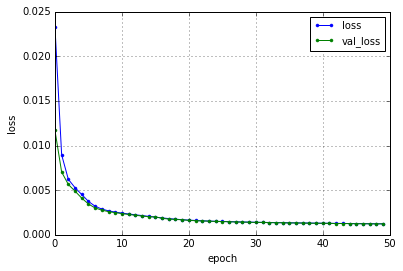

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0206 - val_loss: 0.0078
Epoch 2/50
3s - loss: 0.0058 - val_loss: 0.0045
Epoch 3/50
3s - loss: 0.0038 - val_loss: 0.0032
Epoch 4/50
3s - loss: 0.0028 - val_loss: 0.0025
Epoch 5/50
3s - loss: 0.0023 - val_loss: 0.0022
Epoch 6/50
3s - loss: 0.0020 - val_loss: 0.0019
Epoch 7/50
3s - loss: 0.0018 - val_loss: 0.0018
Epoch 8/50
3s - loss: 0.0016 - val_loss: 0.0016
Epoch 9/50
3s - loss: 0.0015 - val_loss: 0.0015
Epoch 10/50
3s - loss: 0.0014 - val_loss: 0.0013
Epoch 11/50
3s - loss: 0.0013 - val_loss: 0.0013
Epoch 12/50
3s - loss: 0.0012 - val_loss: 0.0012
Epoch 13/50
3s - loss: 0.0012 - val_loss: 0.0011
Epoch 14/50
3s - loss: 0.0011 - val_loss: 0.0011
Epoch 15/50
3s - loss: 0.0010 - val_loss: 9.9916e-04
Epoch 16/50
3s - loss: 9.8727e-04 - val_loss: 9.5828e-04
Epoch 17/50
3s - loss: 9.4531e-04 - val_loss: 9.1286e-04
Epoch 18/50
3s - loss: 9.0489e-04 - val_loss: 8.9098e-04
Epoch 19/50
3s - loss: 8.7092e-04 

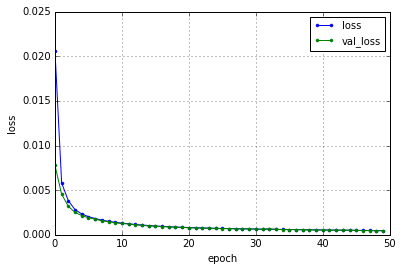

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0196 - val_loss: 0.0059
Epoch 2/50
3s - loss: 0.0044 - val_loss: 0.0034
Epoch 3/50
3s - loss: 0.0029 - val_loss: 0.0024
Epoch 4/50
3s - loss: 0.0022 - val_loss: 0.0020
Epoch 5/50
3s - loss: 0.0018 - val_loss: 0.0017
Epoch 6/50
3s - loss: 0.0015 - val_loss: 0.0014
Epoch 7/50
3s - loss: 0.0014 - val_loss: 0.0013
Epoch 8/50
3s - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
3s - loss: 0.0011 - val_loss: 0.0010
Epoch 10/50
3s - loss: 0.0010 - val_loss: 9.4841e-04
Epoch 11/50
3s - loss: 9.2406e-04 - val_loss: 8.7503e-04
Epoch 12/50
3s - loss: 8.5292e-04 - val_loss: 9.0054e-04
Epoch 13/50
3s - loss: 7.9024e-04 - val_loss: 7.4911e-04
Epoch 14/50
3s - loss: 7.3898e-04 - val_loss: 7.0292e-04
Epoch 15/50
3s - loss: 6.9140e-04 - val_loss: 6.6159e-04
Epoch 16/50
3s - loss: 6.5426e-04 - val_loss: 6.2572e-04
Epoch 17/50
3s - loss: 6.2219e-04 - val_loss: 6.0091e-04
Epoch 18/50
3s - loss: 5.9531e-04 - val_loss: 5.70

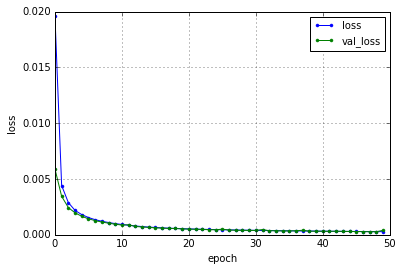

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0136 - val_loss: 0.0048
Epoch 2/50
3s - loss: 0.0036 - val_loss: 0.0028
Epoch 3/50
3s - loss: 0.0023 - val_loss: 0.0020
Epoch 4/50
3s - loss: 0.0018 - val_loss: 0.0016
Epoch 5/50
3s - loss: 0.0014 - val_loss: 0.0013
Epoch 6/50
3s - loss: 0.0012 - val_loss: 0.0011
Epoch 7/50
3s - loss: 0.0010 - val_loss: 9.5159e-04
Epoch 8/50
3s - loss: 9.0172e-04 - val_loss: 8.4290e-04
Epoch 9/50
3s - loss: 8.0955e-04 - val_loss: 7.6036e-04
Epoch 10/50
3s - loss: 7.3180e-04 - val_loss: 6.9707e-04
Epoch 11/50
3s - loss: 6.7821e-04 - val_loss: 6.5557e-04
Epoch 12/50
3s - loss: 6.3139e-04 - val_loss: 5.9918e-04
Epoch 13/50
3s - loss: 5.9032e-04 - val_loss: 5.5610e-04
Epoch 14/50
3s - loss: 5.5683e-04 - val_loss: 5.3755e-04
Epoch 15/50
3s - loss: 5.2795e-04 - val_loss: 4.9855e-04
Epoch 16/50
3s - loss: 5.0087e-04 - val_loss: 4.7799e-04
Epoch 17/50
3s - loss: 4.7986e-04 - val_loss: 4.5392e-04
Epoch 18/50
3s - loss: 4.5

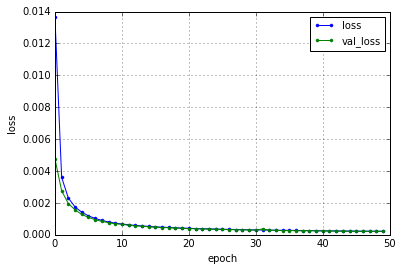

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0122 - val_loss: 0.0029
Epoch 2/50
3s - loss: 0.0022 - val_loss: 0.0017
Epoch 3/50
3s - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
3s - loss: 0.0011 - val_loss: 9.4710e-04
Epoch 5/50
3s - loss: 8.6681e-04 - val_loss: 7.7687e-04
Epoch 6/50
2s - loss: 7.3084e-04 - val_loss: 6.6187e-04
Epoch 7/50
2s - loss: 6.3440e-04 - val_loss: 5.9487e-04
Epoch 8/50
3s - loss: 5.6576e-04 - val_loss: 5.2934e-04
Epoch 9/50
3s - loss: 5.0921e-04 - val_loss: 4.7142e-04
Epoch 10/50
3s - loss: 4.6143e-04 - val_loss: 4.3179e-04
Epoch 11/50
3s - loss: 4.2409e-04 - val_loss: 3.9925e-04
Epoch 12/50
3s - loss: 3.9344e-04 - val_loss: 3.6505e-04
Epoch 13/50
3s - loss: 3.6787e-04 - val_loss: 3.7915e-04
Epoch 14/50
3s - loss: 3.4422e-04 - val_loss: 3.2989e-04
Epoch 15/50
3s - loss: 3.2526e-04 - val_loss: 3.1059e-04
Epoch 16/50
3s - loss: 3.0991e-04 - val_loss: 2.9375e-04
Epoch 17/50
3s - loss: 2.9199e-04 - val_loss: 2.7784e-04
Ep

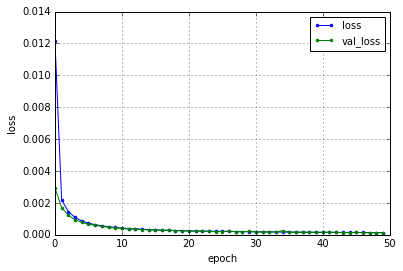

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0068 - val_loss: 0.0017
Epoch 2/50
3s - loss: 0.0013 - val_loss: 0.0010
Epoch 3/50
3s - loss: 8.4982e-04 - val_loss: 7.0584e-04
Epoch 4/50
2s - loss: 6.3043e-04 - val_loss: 5.5253e-04
Epoch 5/50
2s - loss: 5.0543e-04 - val_loss: 4.5689e-04
Epoch 6/50
3s - loss: 4.2655e-04 - val_loss: 3.9247e-04
Epoch 7/50
3s - loss: 3.7077e-04 - val_loss: 3.4357e-04
Epoch 8/50
3s - loss: 3.2781e-04 - val_loss: 3.1108e-04
Epoch 9/50
3s - loss: 2.9731e-04 - val_loss: 2.7100e-04
Epoch 10/50
3s - loss: 2.7338e-04 - val_loss: 2.5843e-04
Epoch 11/50
3s - loss: 2.5491e-04 - val_loss: 2.3262e-04
Epoch 12/50
3s - loss: 2.3490e-04 - val_loss: 2.2239e-04
Epoch 13/50
3s - loss: 2.2098e-04 - val_loss: 2.1418e-04
Epoch 14/50
3s - loss: 2.0938e-04 - val_loss: 2.0850e-04
Epoch 15/50
3s - loss: 1.9881e-04 - val_loss: 1.9423e-04
Epoch 16/50
3s - loss: 1.8974e-04 - val_loss: 1.8121e-04
Epoch 17/50
3s - loss: 1.7965e-04 - val_loss: 1

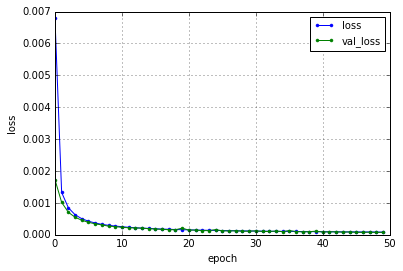

AccY is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0472 - val_loss: 0.0256
Epoch 2/50
0s - loss: 0.0222 - val_loss: 0.0200
Epoch 3/50
0s - loss: 0.0181 - val_loss: 0.0162
Epoch 4/50
0s - loss: 0.0147 - val_loss: 0.0132
Epoch 5/50
0s - loss: 0.0121 - val_loss: 0.0111
Epoch 6/50
0s - loss: 0.0103 - val_loss: 0.0097
Epoch 7/50
0s - loss: 0.0092 - val_loss: 0.0087
Epoch 8/50
0s - loss: 0.0084 - val_loss: 0.0080
Epoch 9/50
0s - loss: 0.0077 - val_loss: 0.0074
Epoch 10/50
0s - loss: 0.0071 - val_loss: 0.0068
Epoch 11/50
0s - loss: 0.0066 - val_loss: 0.0064
Epoch 12/50
0s - loss: 0.0062 - val_loss: 0.0060
Epoch 13/50
0s - loss: 0.0058 - val_loss: 0.0056
Epoch 14/50
0s - loss: 0.0055 - val_loss: 0.0054
Epoch 15/50
0s - loss: 0.0053 - val_loss: 0.0052
Epoch 16/50
0s - loss: 0.0051 - val_loss: 0.0050
Epoch 17/50
0s - loss: 0.0049 

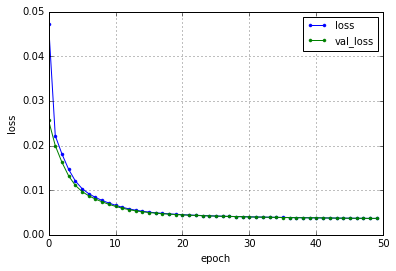

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0353 - val_loss: 0.0205
Epoch 2/50
0s - loss: 0.0179 - val_loss: 0.0154
Epoch 3/50
0s - loss: 0.0136 - val_loss: 0.0119
Epoch 4/50
0s - loss: 0.0107 - val_loss: 0.0096
Epoch 5/50
0s - loss: 0.0088 - val_loss: 0.0081
Epoch 6/50
0s - loss: 0.0076 - val_loss: 0.0071
Epoch 7/50
0s - loss: 0.0067 - val_loss: 0.0063
Epoch 8/50
0s - loss: 0.0060 - val_loss: 0.0057
Epoch 9/50
0s - loss: 0.0055 - val_loss: 0.0053
Epoch 10/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 11/50
0s - loss: 0.0047 - val_loss: 0.0046
Epoch 12/50
0s - loss: 0.0045 - val_loss: 0.0044
Epoch 13/50
0s - loss: 0.0043 - val_loss: 0.0042
Epoch 14/50
0s - loss: 0.0041 - val_loss: 0.0040
Epoch 15/50
0s - loss: 0.0040 - val_loss: 0.0039
Epoch 16/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 17/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 18/50
0s - loss: 0.0036 - val_loss: 0.0035
Epoch 19/50
0s - loss: 0.0034 - val_loss: 0.0034
Epoch 20/50
0s 

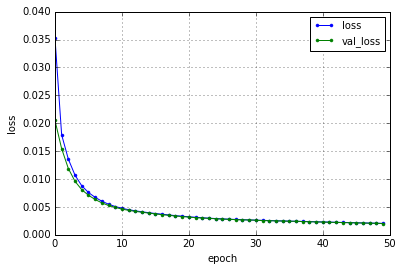

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0360 - val_loss: 0.0193
Epoch 2/50
0s - loss: 0.0160 - val_loss: 0.0129
Epoch 3/50
0s - loss: 0.0106 - val_loss: 0.0086
Epoch 4/50
0s - loss: 0.0075 - val_loss: 0.0066
Epoch 5/50
0s - loss: 0.0060 - val_loss: 0.0055
Epoch 6/50
0s - loss: 0.0051 - val_loss: 0.0048
Epoch 7/50
0s - loss: 0.0045 - val_loss: 0.0043
Epoch 8/50
0s - loss: 0.0041 - val_loss: 0.0039
Epoch 9/50
0s - loss: 0.0038 - val_loss: 0.0036
Epoch 10/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 11/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 12/50
0s - loss: 0.0031 - val_loss: 0.0030
Epoch 13/50
0s - loss: 0.0030 - val_loss: 0.0029
Epoch 14/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 15/50
0s - loss: 0.0027 - val_loss: 0.0027
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 17/50
0s - loss: 0.0026 - val_loss: 0.0025
Epoch 18/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 19/50
0s - loss: 0.0024 - val_loss: 0.0024
Epoch 20/50
0s

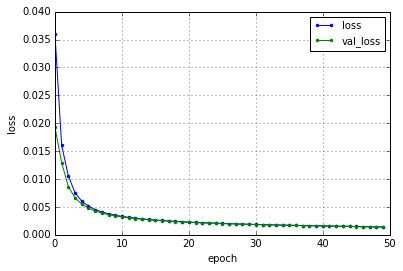

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0382 - val_loss: 0.0172
Epoch 2/50
0s - loss: 0.0132 - val_loss: 0.0099
Epoch 3/50
0s - loss: 0.0082 - val_loss: 0.0069
Epoch 4/50
0s - loss: 0.0062 - val_loss: 0.0056
Epoch 5/50
0s - loss: 0.0052 - val_loss: 0.0048
Epoch 6/50
0s - loss: 0.0045 - val_loss: 0.0042
Epoch 7/50
0s - loss: 0.0040 - val_loss: 0.0039
Epoch 8/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 9/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 10/50
0s - loss: 0.0032 - val_loss: 0.0031
Epoch 11/50
0s - loss: 0.0030 - val_loss: 0.0029
Epoch 12/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 13/50
0s - loss: 0.0027 - val_loss: 0.0027
Epoch 14/50
0s - loss: 0.0026 - val_loss: 0.0026
Epoch 15/50
0s - loss: 0.0025 - val_loss: 0.0025
Epoch 16/50
0s - loss: 0.0024 - val_loss: 0.0024
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0023
Epoch 18/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 19/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 20/50
0s

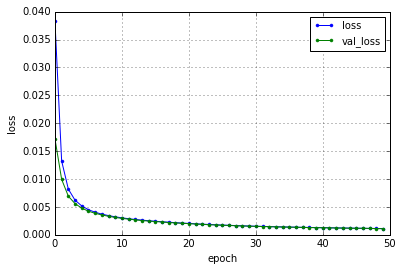

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0315 - val_loss: 0.0140
Epoch 2/50
0s - loss: 0.0100 - val_loss: 0.0074
Epoch 3/50
0s - loss: 0.0062 - val_loss: 0.0053
Epoch 4/50
0s - loss: 0.0048 - val_loss: 0.0043
Epoch 5/50
0s - loss: 0.0039 - val_loss: 0.0036
Epoch 6/50
0s - loss: 0.0033 - val_loss: 0.0031
Epoch 7/50
0s - loss: 0.0030 - val_loss: 0.0028
Epoch 8/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 9/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 10/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 17/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 19/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 20/50
0s

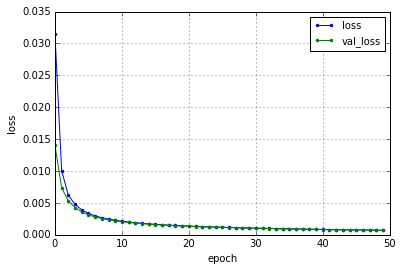

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0210 - val_loss: 0.0074
Epoch 2/50
0s - loss: 0.0054 - val_loss: 0.0041
Epoch 3/50
0s - loss: 0.0036 - val_loss: 0.0031
Epoch 4/50
0s - loss: 0.0029 - val_loss: 0.0026
Epoch 5/50
0s - loss: 0.0025 - val_loss: 0.0023
Epoch 6/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 7/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 8/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 9/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 12/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 16/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 17/50
0s - loss: 0.0010 - val_loss: 9.9556e-04
Epoch 18/50
0s - loss: 9.7808e-04 - val_loss: 9.5144e-04
Epoch 19/50
0s - loss: 9.3529e-04 - val_loss: 9.077

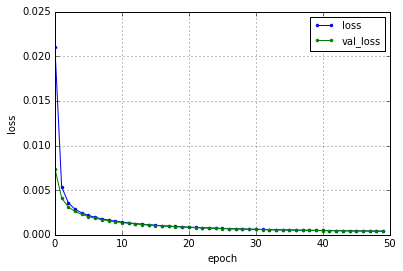

AccY is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0675 - val_loss: 0.0602
Epoch 2/50
0s - loss: 0.0502 - val_loss: 0.0397
Epoch 3/50
0s - loss: 0.0340 - val_loss: 0.0301
Epoch 4/50
0s - loss: 0.0288 - val_loss: 0.0278
Epoch 5/50
0s - loss: 0.0273 - val_loss: 0.0269
Epoch 6/50
0s - loss: 0.0265 - val_loss: 0.0262
Epoch 7/50
0s - loss: 0.0260 - val_loss: 0.0257
Epoch 8/50
0s - loss: 0.0255 - val_loss: 0.0252
Epoch 9/50
0s - loss: 0.0250 - val_loss: 0.0247
Epoch 10/50
0s - loss: 0.0245 - val_loss: 0.0243
Epoch 11/50
0s - loss: 0.0240 - val_loss: 0.0238
Epoch 12/50
0s - loss: 0.0235 - val_loss: 0.0233
Epoch 13/50
0s - loss: 0.0230 - val_loss: 0.0227
Epoch 14/50
0s - loss: 0.0225 - val_loss: 0.0222
Epoch 15/50
0s - loss: 0.0220 - val_loss: 0.0217
Epoch 16/50
0s - loss: 0.0215 - val_loss: 0.0212
Epoch 17/50
0s - loss: 0.0210 

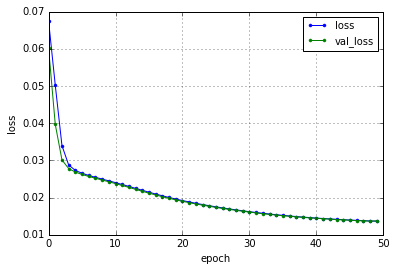

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0633 - val_loss: 0.0498
Epoch 2/50
0s - loss: 0.0395 - val_loss: 0.0318
Epoch 3/50
0s - loss: 0.0291 - val_loss: 0.0272
Epoch 4/50
0s - loss: 0.0265 - val_loss: 0.0259
Epoch 5/50
0s - loss: 0.0255 - val_loss: 0.0250
Epoch 6/50
0s - loss: 0.0247 - val_loss: 0.0243
Epoch 7/50
0s - loss: 0.0240 - val_loss: 0.0236
Epoch 8/50
0s - loss: 0.0232 - val_loss: 0.0229
Epoch 9/50
0s - loss: 0.0225 - val_loss: 0.0221
Epoch 10/50
0s - loss: 0.0217 - val_loss: 0.0214
Epoch 11/50
0s - loss: 0.0210 - val_loss: 0.0206
Epoch 12/50
0s - loss: 0.0203 - val_loss: 0.0199
Epoch 13/50
0s - loss: 0.0195 - val_loss: 0.0192
Epoch 14/50
0s - loss: 0.0188 - val_loss: 0.0185
Epoch 15/50
0s - loss: 0.0181 - val_loss: 0.0178
Epoch 16/50
0s - loss: 0.0175 - val_loss: 0.0171
Epoch 17/50
0s - loss: 0.0168 - val_loss: 0.0164
Epoch 18/50
0s - loss: 0.0161 - val_loss: 0.0158
Epoch 19/50
0s - loss: 0.0155 - val_loss: 0.0152
Epoch 20/50
0s 

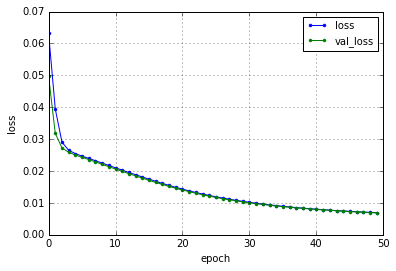

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0629 - val_loss: 0.0458
Epoch 2/50
0s - loss: 0.0346 - val_loss: 0.0280
Epoch 3/50
0s - loss: 0.0265 - val_loss: 0.0256
Epoch 4/50
0s - loss: 0.0251 - val_loss: 0.0247
Epoch 5/50
0s - loss: 0.0242 - val_loss: 0.0238
Epoch 6/50
0s - loss: 0.0233 - val_loss: 0.0228
Epoch 7/50
0s - loss: 0.0223 - val_loss: 0.0218
Epoch 8/50
0s - loss: 0.0213 - val_loss: 0.0207
Epoch 9/50
0s - loss: 0.0202 - val_loss: 0.0196
Epoch 10/50
0s - loss: 0.0191 - val_loss: 0.0185
Epoch 11/50
0s - loss: 0.0180 - val_loss: 0.0175
Epoch 12/50
0s - loss: 0.0170 - val_loss: 0.0165
Epoch 13/50
0s - loss: 0.0160 - val_loss: 0.0156
Epoch 14/50
0s - loss: 0.0151 - val_loss: 0.0147
Epoch 15/50
0s - loss: 0.0143 - val_loss: 0.0139
Epoch 16/50
0s - loss: 0.0135 - val_loss: 0.0131
Epoch 17/50
0s - loss: 0.0128 - val_loss: 0.0124
Epoch 18/50
0s - loss: 0.0121 - val_loss: 0.0118
Epoch 19/50
0s - loss: 0.0115 - val_loss: 0.0112
Epoch 20/50
0s

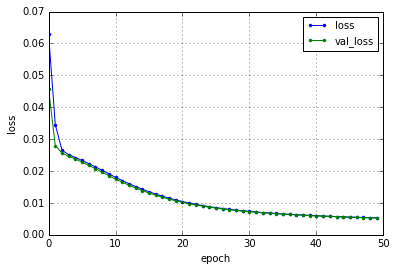

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0653 - val_loss: 0.0482
Epoch 2/50
0s - loss: 0.0361 - val_loss: 0.0281
Epoch 3/50
0s - loss: 0.0259 - val_loss: 0.0245
Epoch 4/50
0s - loss: 0.0237 - val_loss: 0.0230
Epoch 5/50
0s - loss: 0.0223 - val_loss: 0.0216
Epoch 6/50
0s - loss: 0.0209 - val_loss: 0.0201
Epoch 7/50
0s - loss: 0.0194 - val_loss: 0.0187
Epoch 8/50
0s - loss: 0.0179 - val_loss: 0.0172
Epoch 9/50
0s - loss: 0.0165 - val_loss: 0.0157
Epoch 10/50
0s - loss: 0.0151 - val_loss: 0.0144
Epoch 11/50
0s - loss: 0.0138 - val_loss: 0.0132
Epoch 12/50
0s - loss: 0.0128 - val_loss: 0.0122
Epoch 13/50
0s - loss: 0.0118 - val_loss: 0.0114
Epoch 14/50
0s - loss: 0.0110 - val_loss: 0.0106
Epoch 15/50
0s - loss: 0.0103 - val_loss: 0.0100
Epoch 16/50
0s - loss: 0.0097 - val_loss: 0.0095
Epoch 17/50
0s - loss: 0.0092 - val_loss: 0.0090
Epoch 18/50
0s - loss: 0.0088 - val_loss: 0.0086
Epoch 19/50
0s - loss: 0.0084 - val_loss: 0.0082
Epoch 20/50
0s

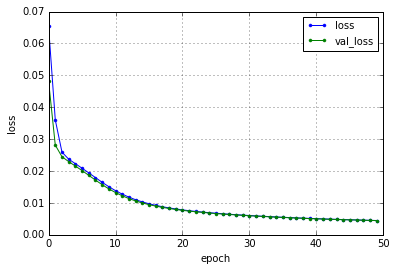

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0583 - val_loss: 0.0338
Epoch 2/50
0s - loss: 0.0276 - val_loss: 0.0245
Epoch 3/50
0s - loss: 0.0234 - val_loss: 0.0224
Epoch 4/50
0s - loss: 0.0215 - val_loss: 0.0206
Epoch 5/50
0s - loss: 0.0197 - val_loss: 0.0188
Epoch 6/50
0s - loss: 0.0179 - val_loss: 0.0170
Epoch 7/50
0s - loss: 0.0162 - val_loss: 0.0153
Epoch 8/50
0s - loss: 0.0146 - val_loss: 0.0138
Epoch 9/50
0s - loss: 0.0132 - val_loss: 0.0125
Epoch 10/50
0s - loss: 0.0119 - val_loss: 0.0113
Epoch 11/50
0s - loss: 0.0108 - val_loss: 0.0103
Epoch 12/50
0s - loss: 0.0099 - val_loss: 0.0094
Epoch 13/50
0s - loss: 0.0091 - val_loss: 0.0087
Epoch 14/50
0s - loss: 0.0084 - val_loss: 0.0081
Epoch 15/50
0s - loss: 0.0078 - val_loss: 0.0076
Epoch 16/50
0s - loss: 0.0074 - val_loss: 0.0072
Epoch 17/50
0s - loss: 0.0069 - val_loss: 0.0068
Epoch 18/50
0s - loss: 0.0066 - val_loss: 0.0064
Epoch 19/50
0s - loss: 0.0063 - val_loss: 0.0062
Epoch 20/50
0s

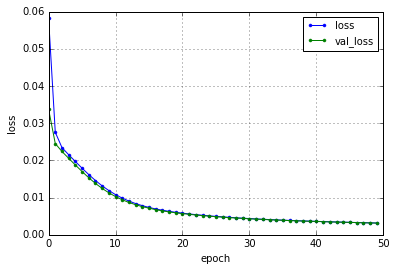

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0549 - val_loss: 0.0293
Epoch 2/50
0s - loss: 0.0242 - val_loss: 0.0211
Epoch 3/50
0s - loss: 0.0193 - val_loss: 0.0175
Epoch 4/50
0s - loss: 0.0161 - val_loss: 0.0146
Epoch 5/50
0s - loss: 0.0135 - val_loss: 0.0123
Epoch 6/50
0s - loss: 0.0114 - val_loss: 0.0104
Epoch 7/50
0s - loss: 0.0097 - val_loss: 0.0089
Epoch 8/50
0s - loss: 0.0083 - val_loss: 0.0078
Epoch 9/50
0s - loss: 0.0074 - val_loss: 0.0069
Epoch 10/50
0s - loss: 0.0066 - val_loss: 0.0063
Epoch 11/50
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 12/50
0s - loss: 0.0056 - val_loss: 0.0054
Epoch 13/50
0s - loss: 0.0053 - val_loss: 0.0051
Epoch 14/50
0s - loss: 0.0050 - val_loss: 0.0048
Epoch 15/50
0s - loss: 0.0047 - val_loss: 0.0046
Epoch 16/50
0s - loss: 0.0046 - val_loss: 0.0045
Epoch 17/50
0s - loss: 0.0044 - val_loss: 0.0043
Epoch 18/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 19/50
0s - loss: 0.0041 - val_loss: 0.0040
Epoch 20/50
0s

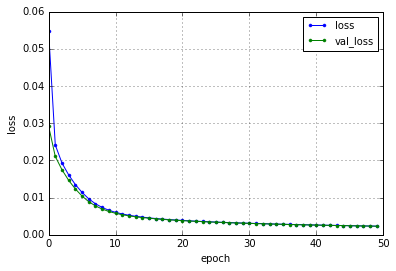

AccY is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0717 - val_loss: 0.0700
Epoch 2/50
0s - loss: 0.0685 - val_loss: 0.0666
Epoch 3/50
0s - loss: 0.0649 - val_loss: 0.0625
Epoch 4/50
0s - loss: 0.0603 - val_loss: 0.0576
Epoch 5/50
0s - loss: 0.0552 - val_loss: 0.0523
Epoch 6/50
0s - loss: 0.0499 - val_loss: 0.0473
Epoch 7/50
0s - loss: 0.0453 - val_loss: 0.0430
Epoch 8/50
0s - loss: 0.0415 - val_loss: 0.0398
Epoch 9/50
0s - loss: 0.0387 - val_loss: 0.0374
Epoch 10/50
0s - loss: 0.0366 - val_loss: 0.0357
Epoch 11/50
0s - loss: 0.0351 - val_loss: 0.0345
Epoch 12/50
0s - loss: 0.0341 - val_loss: 0.0337
Epoch 13/50
0s - loss: 0.0334 - val_loss: 0.0331
Epoch 14/50
0s - loss: 0.0328 - val_loss: 0.0326
Epoch 15/50
0s - loss: 0.0324 - val_loss: 0.0323
Epoch 16/50
0s - loss: 0.0321 - val_loss: 0.0320
Epoch 17/50
0s - loss: 0.0319 

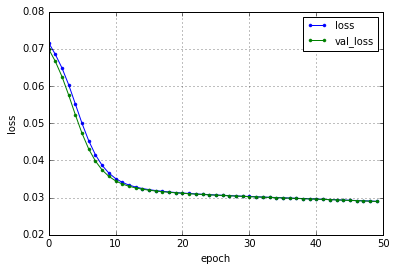

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0720 - val_loss: 0.0694
Epoch 2/50
0s - loss: 0.0672 - val_loss: 0.0643
Epoch 3/50
0s - loss: 0.0614 - val_loss: 0.0577
Epoch 4/50
0s - loss: 0.0544 - val_loss: 0.0504
Epoch 5/50
0s - loss: 0.0474 - val_loss: 0.0440
Epoch 6/50
0s - loss: 0.0416 - val_loss: 0.0391
Epoch 7/50
0s - loss: 0.0376 - val_loss: 0.0359
Epoch 8/50
0s - loss: 0.0349 - val_loss: 0.0339
Epoch 9/50
0s - loss: 0.0333 - val_loss: 0.0327
Epoch 10/50
0s - loss: 0.0323 - val_loss: 0.0319
Epoch 11/50
0s - loss: 0.0317 - val_loss: 0.0315
Epoch 12/50
0s - loss: 0.0313 - val_loss: 0.0311
Epoch 13/50
0s - loss: 0.0310 - val_loss: 0.0309
Epoch 14/50
0s - loss: 0.0308 - val_loss: 0.0307
Epoch 15/50
0s - loss: 0.0306 - val_loss: 0.0305
Epoch 16/50
0s - loss: 0.0305 - val_loss: 0.0304
Epoch 17/50
0s - loss: 0.0304 - val_loss: 0.0303
Epoch 18/50
0s - loss: 0.0302 - val_loss: 0.0302
Epoch 19/50
0s - loss: 0.0301 - val_loss: 0.0300
Epoch 20/50
0s 

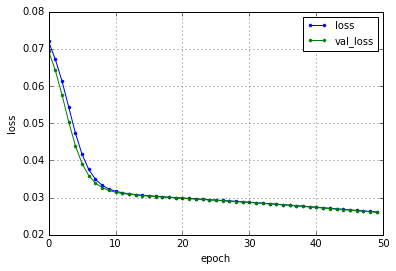

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0719 - val_loss: 0.0686
Epoch 2/50
0s - loss: 0.0660 - val_loss: 0.0624
Epoch 3/50
0s - loss: 0.0591 - val_loss: 0.0548
Epoch 4/50
0s - loss: 0.0513 - val_loss: 0.0472
Epoch 5/50
0s - loss: 0.0443 - val_loss: 0.0411
Epoch 6/50
0s - loss: 0.0390 - val_loss: 0.0368
Epoch 7/50
0s - loss: 0.0356 - val_loss: 0.0342
Epoch 8/50
0s - loss: 0.0335 - val_loss: 0.0327
Epoch 9/50
0s - loss: 0.0322 - val_loss: 0.0317
Epoch 10/50
0s - loss: 0.0315 - val_loss: 0.0312
Epoch 11/50
0s - loss: 0.0310 - val_loss: 0.0308
Epoch 12/50
0s - loss: 0.0307 - val_loss: 0.0305
Epoch 13/50
0s - loss: 0.0304 - val_loss: 0.0303
Epoch 14/50
0s - loss: 0.0302 - val_loss: 0.0301
Epoch 15/50
0s - loss: 0.0301 - val_loss: 0.0300
Epoch 16/50
0s - loss: 0.0299 - val_loss: 0.0298
Epoch 17/50
0s - loss: 0.0298 - val_loss: 0.0297
Epoch 18/50
0s - loss: 0.0296 - val_loss: 0.0296
Epoch 19/50
0s - loss: 0.0295 - val_loss: 0.0294
Epoch 20/50
0s

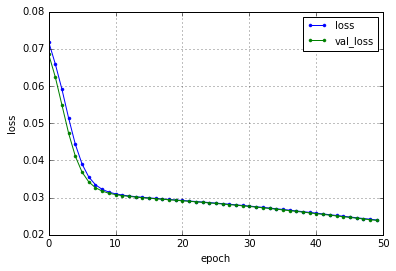

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0721 - val_loss: 0.0683
Epoch 2/50
0s - loss: 0.0652 - val_loss: 0.0611
Epoch 3/50
0s - loss: 0.0571 - val_loss: 0.0522
Epoch 4/50
0s - loss: 0.0482 - val_loss: 0.0436
Epoch 5/50
0s - loss: 0.0406 - val_loss: 0.0375
Epoch 6/50
0s - loss: 0.0357 - val_loss: 0.0339
Epoch 7/50
0s - loss: 0.0330 - val_loss: 0.0320
Epoch 8/50
0s - loss: 0.0315 - val_loss: 0.0311
Epoch 9/50
0s - loss: 0.0308 - val_loss: 0.0305
Epoch 10/50
0s - loss: 0.0304 - val_loss: 0.0302
Epoch 11/50
0s - loss: 0.0301 - val_loss: 0.0300
Epoch 12/50
0s - loss: 0.0299 - val_loss: 0.0298
Epoch 13/50
0s - loss: 0.0298 - val_loss: 0.0297
Epoch 14/50
0s - loss: 0.0296 - val_loss: 0.0296
Epoch 15/50
0s - loss: 0.0295 - val_loss: 0.0294
Epoch 16/50
0s - loss: 0.0294 - val_loss: 0.0293
Epoch 17/50
0s - loss: 0.0292 - val_loss: 0.0292
Epoch 18/50
0s - loss: 0.0291 - val_loss: 0.0290
Epoch 19/50
0s - loss: 0.0290 - val_loss: 0.0289
Epoch 20/50
0s

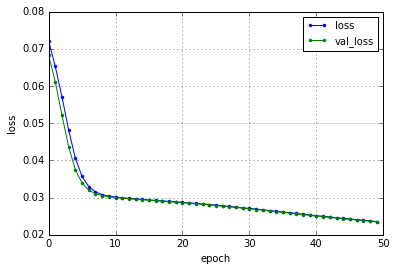

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0727 - val_loss: 0.0666
Epoch 2/50
0s - loss: 0.0622 - val_loss: 0.0566
Epoch 3/50
0s - loss: 0.0518 - val_loss: 0.0462
Epoch 4/50
0s - loss: 0.0424 - val_loss: 0.0383
Epoch 5/50
0s - loss: 0.0360 - val_loss: 0.0337
Epoch 6/50
0s - loss: 0.0325 - val_loss: 0.0314
Epoch 7/50
0s - loss: 0.0308 - val_loss: 0.0302
Epoch 8/50
0s - loss: 0.0299 - val_loss: 0.0296
Epoch 9/50
0s - loss: 0.0294 - val_loss: 0.0292
Epoch 10/50
0s - loss: 0.0291 - val_loss: 0.0289
Epoch 11/50
0s - loss: 0.0288 - val_loss: 0.0286
Epoch 12/50
0s - loss: 0.0285 - val_loss: 0.0283
Epoch 13/50
0s - loss: 0.0282 - val_loss: 0.0281
Epoch 14/50
0s - loss: 0.0279 - val_loss: 0.0278
Epoch 15/50
0s - loss: 0.0277 - val_loss: 0.0275
Epoch 16/50
0s - loss: 0.0274 - val_loss: 0.0272
Epoch 17/50
0s - loss: 0.0271 - val_loss: 0.0270
Epoch 18/50
0s - loss: 0.0269 - val_loss: 0.0267
Epoch 19/50
0s - loss: 0.0266 - val_loss: 0.0264
Epoch 20/50
0s

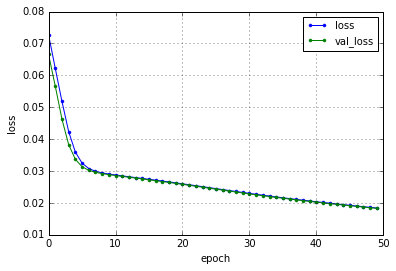

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0790 - val_loss: 0.0686
Epoch 2/50
0s - loss: 0.0619 - val_loss: 0.0538
Epoch 3/50
0s - loss: 0.0477 - val_loss: 0.0412
Epoch 4/50
0s - loss: 0.0376 - val_loss: 0.0343
Epoch 5/50
0s - loss: 0.0327 - val_loss: 0.0312
Epoch 6/50
0s - loss: 0.0305 - val_loss: 0.0298
Epoch 7/50
0s - loss: 0.0294 - val_loss: 0.0289
Epoch 8/50
0s - loss: 0.0287 - val_loss: 0.0283
Epoch 9/50
0s - loss: 0.0281 - val_loss: 0.0277
Epoch 10/50
0s - loss: 0.0275 - val_loss: 0.0272
Epoch 11/50
0s - loss: 0.0270 - val_loss: 0.0267
Epoch 12/50
0s - loss: 0.0265 - val_loss: 0.0262
Epoch 13/50
0s - loss: 0.0260 - val_loss: 0.0258
Epoch 14/50
0s - loss: 0.0256 - val_loss: 0.0253
Epoch 15/50
0s - loss: 0.0251 - val_loss: 0.0248
Epoch 16/50
0s - loss: 0.0247 - val_loss: 0.0244
Epoch 17/50
0s - loss: 0.0242 - val_loss: 0.0239
Epoch 18/50
0s - loss: 0.0237 - val_loss: 0.0235
Epoch 19/50
0s - loss: 0.0233 - val_loss: 0.0230
Epoch 20/50
0s

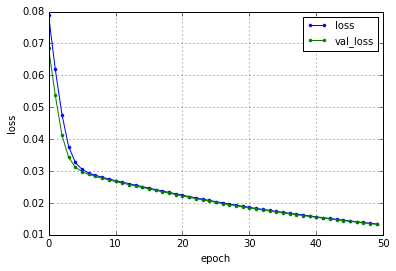

AccY is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0728 - val_loss: 0.0724
Epoch 2/50
0s - loss: 0.0722 - val_loss: 0.0718
Epoch 3/50
0s - loss: 0.0717 - val_loss: 0.0714
Epoch 4/50
0s - loss: 0.0712 - val_loss: 0.0709
Epoch 5/50
0s - loss: 0.0707 - val_loss: 0.0704
Epoch 6/50
0s - loss: 0.0702 - val_loss: 0.0699
Epoch 7/50
0s - loss: 0.0697 - val_loss: 0.0694
Epoch 8/50
0s - loss: 0.0693 - val_loss: 0.0689
Epoch 9/50
0s - loss: 0.0688 - val_loss: 0.0684
Epoch 10/50
0s - loss: 0.0683 - val_loss: 0.0679
Epoch 11/50
0s - loss: 0.0677 - val_loss: 0.0674
Epoch 12/50
0s - loss: 0.0672 - val_loss: 0.0669
Epoch 13/50
0s - loss: 0.0667 - val_loss: 0.0663
Epoch 14/50
0s - loss: 0.0661 - val_loss: 0.0657
Epoch 15/50
0s - loss: 0.0655 - val_loss: 0.0651
Epoch 16/50
0s - loss: 0.0649 - val_loss: 0.0645
Epoch 17/50
0s - loss: 0.0642 - v

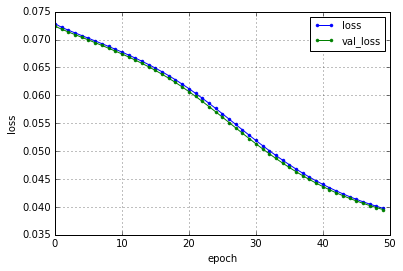

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0735 - val_loss: 0.0727
Epoch 2/50
0s - loss: 0.0724 - val_loss: 0.0719
Epoch 3/50
0s - loss: 0.0716 - val_loss: 0.0712
Epoch 4/50
0s - loss: 0.0710 - val_loss: 0.0705
Epoch 5/50
0s - loss: 0.0703 - val_loss: 0.0699
Epoch 6/50
0s - loss: 0.0696 - val_loss: 0.0692
Epoch 7/50
0s - loss: 0.0689 - val_loss: 0.0684
Epoch 8/50
0s - loss: 0.0682 - val_loss: 0.0677
Epoch 9/50
0s - loss: 0.0674 - val_loss: 0.0668
Epoch 10/50
0s - loss: 0.0665 - val_loss: 0.0659
Epoch 11/50
0s - loss: 0.0656 - val_loss: 0.0650
Epoch 12/50
0s - loss: 0.0646 - val_loss: 0.0640
Epoch 13/50
0s - loss: 0.0636 - val_loss: 0.0629
Epoch 14/50
0s - loss: 0.0625 - val_loss: 0.0618
Epoch 15/50
0s - loss: 0.0614 - val_loss: 0.0607
Epoch 16/50
0s - loss: 0.0603 - val_loss: 0.0595
Epoch 17/50
0s - loss: 0.0591 - val_loss: 0.0583
Epoch 18/50
0s - loss: 0.0579 - val_loss: 0.0571
Epoch 19/50
0s - loss: 0.0567 - val_loss: 0.0559
Epoch 20/50
0s - 

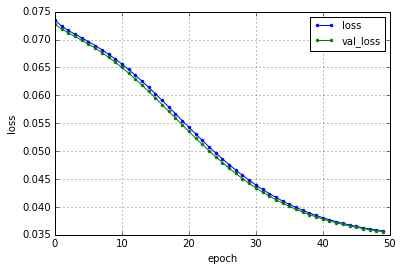

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0738 - val_loss: 0.0730
Epoch 2/50
0s - loss: 0.0726 - val_loss: 0.0721
Epoch 3/50
0s - loss: 0.0718 - val_loss: 0.0713
Epoch 4/50
0s - loss: 0.0711 - val_loss: 0.0706
Epoch 5/50
0s - loss: 0.0703 - val_loss: 0.0698
Epoch 6/50
0s - loss: 0.0695 - val_loss: 0.0690
Epoch 7/50
0s - loss: 0.0687 - val_loss: 0.0681
Epoch 8/50
0s - loss: 0.0678 - val_loss: 0.0672
Epoch 9/50
0s - loss: 0.0668 - val_loss: 0.0662
Epoch 10/50
0s - loss: 0.0658 - val_loss: 0.0651
Epoch 11/50
0s - loss: 0.0647 - val_loss: 0.0640
Epoch 12/50
0s - loss: 0.0635 - val_loss: 0.0627
Epoch 13/50
0s - loss: 0.0623 - val_loss: 0.0615
Epoch 14/50
0s - loss: 0.0610 - val_loss: 0.0601
Epoch 15/50
0s - loss: 0.0596 - val_loss: 0.0587
Epoch 16/50
0s - loss: 0.0582 - val_loss: 0.0573
Epoch 17/50
0s - loss: 0.0568 - val_loss: 0.0558
Epoch 18/50
0s - loss: 0.0553 - val_loss: 0.0544
Epoch 19/50
0s - loss: 0.0538 - val_loss: 0.0529
Epoch 20/50
0s -

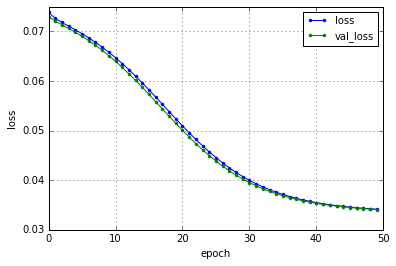

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0741 - val_loss: 0.0733
Epoch 2/50
0s - loss: 0.0730 - val_loss: 0.0725
Epoch 3/50
0s - loss: 0.0723 - val_loss: 0.0719
Epoch 4/50
0s - loss: 0.0716 - val_loss: 0.0712
Epoch 5/50
0s - loss: 0.0710 - val_loss: 0.0706
Epoch 6/50
0s - loss: 0.0703 - val_loss: 0.0699
Epoch 7/50
0s - loss: 0.0696 - val_loss: 0.0692
Epoch 8/50
0s - loss: 0.0689 - val_loss: 0.0684
Epoch 9/50
0s - loss: 0.0681 - val_loss: 0.0676
Epoch 10/50
0s - loss: 0.0673 - val_loss: 0.0668
Epoch 11/50
0s - loss: 0.0664 - val_loss: 0.0658
Epoch 12/50
0s - loss: 0.0655 - val_loss: 0.0648
Epoch 13/50
0s - loss: 0.0645 - val_loss: 0.0638
Epoch 14/50
0s - loss: 0.0634 - val_loss: 0.0627
Epoch 15/50
0s - loss: 0.0622 - val_loss: 0.0615
Epoch 16/50
0s - loss: 0.0610 - val_loss: 0.0602
Epoch 17/50
0s - loss: 0.0597 - val_loss: 0.0589
Epoch 18/50
0s - loss: 0.0584 - val_loss: 0.0575
Epoch 19/50
0s - loss: 0.0570 - val_loss: 0.0562
Epoch 20/50
0s -

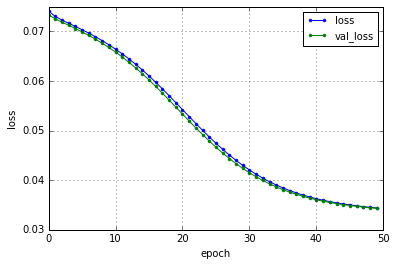

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0768 - val_loss: 0.0748
Epoch 2/50
0s - loss: 0.0740 - val_loss: 0.0729
Epoch 3/50
0s - loss: 0.0725 - val_loss: 0.0716
Epoch 4/50
0s - loss: 0.0712 - val_loss: 0.0704
Epoch 5/50
0s - loss: 0.0700 - val_loss: 0.0692
Epoch 6/50
0s - loss: 0.0687 - val_loss: 0.0679
Epoch 7/50
0s - loss: 0.0673 - val_loss: 0.0664
Epoch 8/50
0s - loss: 0.0659 - val_loss: 0.0648
Epoch 9/50
0s - loss: 0.0643 - val_loss: 0.0632
Epoch 10/50
0s - loss: 0.0626 - val_loss: 0.0614
Epoch 11/50
0s - loss: 0.0608 - val_loss: 0.0596
Epoch 12/50
0s - loss: 0.0589 - val_loss: 0.0577
Epoch 13/50
0s - loss: 0.0570 - val_loss: 0.0558
Epoch 14/50
0s - loss: 0.0551 - val_loss: 0.0539
Epoch 15/50
0s - loss: 0.0532 - val_loss: 0.0520
Epoch 16/50
0s - loss: 0.0514 - val_loss: 0.0502
Epoch 17/50
0s - loss: 0.0496 - val_loss: 0.0485
Epoch 18/50
0s - loss: 0.0479 - val_loss: 0.0468
Epoch 19/50
0s - loss: 0.0462 - val_loss: 0.0453
Epoch 20/50
0s -

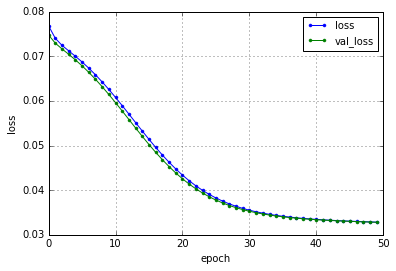

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0813 - val_loss: 0.0770
Epoch 2/50
0s - loss: 0.0756 - val_loss: 0.0734
Epoch 3/50
0s - loss: 0.0725 - val_loss: 0.0710
Epoch 4/50
0s - loss: 0.0702 - val_loss: 0.0688
Epoch 5/50
0s - loss: 0.0679 - val_loss: 0.0665
Epoch 6/50
0s - loss: 0.0656 - val_loss: 0.0640
Epoch 7/50
0s - loss: 0.0631 - val_loss: 0.0614
Epoch 8/50
0s - loss: 0.0605 - val_loss: 0.0587
Epoch 9/50
0s - loss: 0.0577 - val_loss: 0.0559
Epoch 10/50
0s - loss: 0.0549 - val_loss: 0.0532
Epoch 11/50
0s - loss: 0.0522 - val_loss: 0.0505
Epoch 12/50
0s - loss: 0.0496 - val_loss: 0.0480
Epoch 13/50
0s - loss: 0.0471 - val_loss: 0.0457
Epoch 14/50
0s - loss: 0.0449 - val_loss: 0.0436
Epoch 15/50
0s - loss: 0.0429 - val_loss: 0.0418
Epoch 16/50
0s - loss: 0.0412 - val_loss: 0.0402
Epoch 17/50
0s - loss: 0.0397 - val_loss: 0.0389
Epoch 18/50
0s - loss: 0.0385 - val_loss: 0.0378
Epoch 19/50
0s - loss: 0.0375 - val_loss: 0.0369
Epoch 20/50
0s -

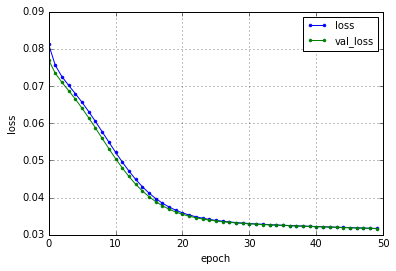

In [7]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2 ,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()